# Load Library

In [13]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import datasets
from Class.logisticRegression import logisticRegression

import matplotlib.pyplot as plt


import seaborn as sn
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load data

In [14]:
df = pd.read_csv("./Data/heart_clean_data.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,PhysicalActivity,...,Borderline Diabetic,Pregnancy Diabetic,Female,Male,White,Black,Asian,American Indian/Alaskan Native,Other,Hispanic
0,0,16.60,1,0,0,3.0,30.0,0,8,1,...,0.0,0.0,1,0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,20.34,0,0,1,0.0,0.0,0,13,1,...,0.0,0.0,1,0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,26.58,1,0,0,20.0,30.0,0,10,1,...,0.0,0.0,0,1,1.0,0.0,0.0,0.0,0.0,0.0
3,0,24.21,0,0,0,0.0,0.0,0,12,0,...,0.0,0.0,1,0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,23.71,0,0,0,28.0,0.0,1,5,1,...,0.0,0.0,1,0,1.0,0.0,0.0,0.0,0.0,0.0


# Split data

In [15]:
X   = df.iloc[:, 1:].to_numpy()
y   = df.iloc[:, 0].to_numpy()

In [16]:

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.1)
x_train,x_validation,y_train,y_validation = train_test_split(x_train,y_train,test_size=0.2)


# Sklearn Logistic regresion

In [17]:
from sklearn.linear_model import LogisticRegression

## Train

In [18]:
sklearnReg = LogisticRegression(max_iter=500)
sklearnReg.fit(x_train, y_train)


d:\Programas\Anaconda\envs\ISTec\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=500)

## Test accuracy

In [19]:
predictions=sklearnReg.predict(x_test)

In [20]:
def accuracy (y_true,y_pred):
    accuracy = np.sum(y_true==y_pred)/len(y_true)
    return accuracy

In [21]:
print("LR classification accuracy:",accuracy(y_test,predictions))

LR classification accuracy: 0.9149781113195747


# Save model

In [22]:
import pickle
import os
path="Weights/HeartSklearn"
try:
    os.makedirs(path)
except:
    pass
file = path + '/cnnModel.pkl'
with open(file, 'wb') as outp:
    pickle.dump(sklearnReg.__dict__, outp, pickle.HIGHEST_PROTOCOL)



# Load model

In [23]:

file = path + '/cnnModel.pkl'
f = open(file, 'rb')
tmp_dict = pickle.load(f)
f.close()   
sklearnReg2 = LogisticRegression(max_iter=500)       
sklearnReg2.__dict__.update(tmp_dict) 

In [24]:
predictions=sklearnReg.predict(x_test)
print("LR classification accuracy:",accuracy(y_test,predictions))

LR classification accuracy: 0.9149781113195747


# Hand Logistic regresion

## Train

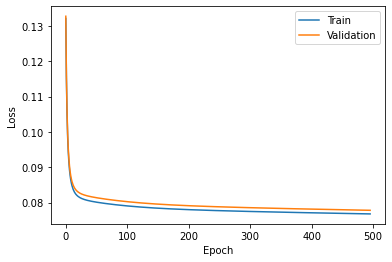

In [25]:
regressor = logisticRegression(learningRate=0.001,n_iters=500)
lossTrain,lossValidation = regressor.fit(x_train,y_train,x_validation,y_validation)
w = 5
lossTrain[0]=np.convolve(lossTrain[0], np.ones(w), 'valid')/w
lossValidation[0]=np.convolve(lossValidation[0], np.ones(w), 'valid')/w
plt.plot(lossTrain[0],label='Train')
plt.plot(lossValidation[0],label='Validation')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

## Test accuracy

In [26]:
predictions=regressor.predict(x_test)
print("LR classification accuracy:",accuracy(y_test,predictions))

LR classification accuracy: 0.9145090681676048


## Export model

In [27]:
regressor.saveWeights('Weights/heartLinearRegresion')

## Load model

In [28]:
regressor2 = logisticRegression(learningRate=0.00001,n_iters=10000)
regressor2.loadWeights('Weights/heartLinearRegresion')
predictions=regressor2.predict(x_test)
print("LR classification accuracy:",accuracy(y_test,predictions))

LR classification accuracy: 0.9145090681676048
